We use the SoFifa dataset 25 for our extended league squad optimization problem as it contains all the important aspects of the game and player scores per positions


In [1]:
import os
import sys
from pathlib import Path

BASE_DIR = Path.cwd().parent
DB_PATH = BASE_DIR / "data" / "portugal_squad.db"
SRC_DIR = BASE_DIR / "src"
sys.path.append(str(BASE_DIR))

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

import pandas as pd 
pd.set_option('display.max_columns', None)



In [3]:
df_players_fifa23 = pd.read_csv(f'{BASE_DIR}/data/Fifa_2023/players_fifa23.csv',low_memory=False)
# df_team_fifa23 = pd.read_csv(f'{BASE_DIR}/data/Fifa_2023/teams_fifa23.csv',low_memory=False)


In [4]:
# df_team_fifa23.info()
df_players_fifa23.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,Growth,TotalStats,BaseStats,Positions,BestPosition,Club,ValueEUR,WageEUR,ReleaseClause,ClubPosition,ContractUntil,ClubNumber,ClubJoined,OnLoad,NationalTeam,NationalPosition,NationalNumber,PreferredFoot,IntReputation,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,0,2190,452,RW,CAM,Paris Saint-Germain,54000000,195000,99900000,RW,2023.0,30.0,2021,False,Argentina,RW,10.0,Left,5,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,0,2147,455,"CF,ST",CF,Real Madrid CF,64000000,450000,131199999,CF,2023.0,9.0,2009,False,France,ST,19.0,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,0,2205,458,ST,ST,FC Barcelona,84000000,420000,172200000,ST,2025.0,9.0,2022,False,Poland,ST,9.0,Right,5,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,0,2303,483,"CM,CAM",CM,Manchester City,107500000,350000,198900000,CM,2025.0,17.0,2015,False,Belgium,RF,7.0,Right,4,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,4,2177,470,"ST,LW",ST,Paris Saint-Germain,190500000,230000,366700000,ST,2024.0,7.0,2018,False,France,ST,10.0,Right,4,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [5]:
# df_team_fifa23.head()
cols_to_drop = ['TotalStats','BaseStats','ContractUntil','ClubNumber','ClubJoined','OnLoad','NationalPosition','NationalNumber','IntReputation','ReleaseClause','PhotoUrl']
df_players = df_players_fifa23.copy()

df_players = df_players.drop(columns=cols_to_drop)
df_players.head()

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,RW,CAM,Paris Saint-Germain,54000000,195000,RW,Argentina,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,"CF,ST",CF,Real Madrid CF,64000000,450000,CF,France,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,ST,ST,FC Barcelona,84000000,420000,ST,Poland,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,"CM,CAM",CM,Manchester City,107500000,350000,CM,Belgium,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,"ST,LW",ST,Paris Saint-Germain,190500000,230000,ST,France,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


## Simplify table:
1. clean the table:
    * merge Positions and BestPositions to PlayablePositions
    * roles_per_positions : per role scores
    * attack_score = mean(attacking_positions),def_score = mean(defensive_positions),mid_score=mean(midfield_positions)
2. keep the overall score  
3. constraints, main: budget, formation, sub: age

In [6]:
global_position = {  "CB": "DF", "RB": "DF",'LB':'DF','RWB':'DF','LWB':'DF',
                            "CDM": "MF", "CAM": "MF",'LM':'MF','RM':'MF','CM':'MF',
                           "ST": "FW", "CF": "FW",'LF':'FW','RF':'FW',"RW": "FW",'LW':'FW',
                           "GK":"GK"
                        }

position_to_roles = {'FW': [], 'MF': [], 'DF': [],'GK':[]}
for role, pos_type in global_position.items():
    position_to_roles[pos_type].append(role + 'Rating')


In [7]:
def get_unique_positions(row):
    pos_list = row['Positions'].split(', ')
    pos_list.append(row['BestPosition'])
    return list(set(pos_list))

In [8]:
# Global position mapping
global_position = {
    "CB": "DF", "RB": "DF", 'LB': 'DF', 'RWB': 'DF', 'LWB': 'DF',
    "CDM": "MF", "CAM": "MF", 'LM': 'MF', 'RM': 'MF', 'CM': 'MF',
    "ST": "FW", "CF": "FW", 'LF': 'FW', 'RF': 'FW', "RW": "FW", 'LW': 'FW', 'GK':'GK'
}

# 1. Get unique positions - fixed to handle overlaps properly
def get_unique_positions(row):
    # positions = [row['Positions'].split(',') if ',' in  row['Positions'] else row['Positions']]
    positions = [p.strip() for p in row['Positions'].split(',')]
    positions.extend([row['BestPosition']])
    return list(set(positions))

df_players['PossiblePositions'] = df_players.apply(get_unique_positions, axis=1)


# 2. Calculate position scores - vectorized, all at once
rating_cols = [col for col in df_players.columns if 'Rating' in col]

# Invert the global_position dictionary for easier lookup
position_to_roles = {'FW': [], 'MF': [], 'DF': [],'GK':[]}
for role, pos_type in global_position.items():
    position_to_roles[pos_type].append(role + 'Rating')

# Calculate all three scores in one go using vectorized operations
for pos_type, cols in position_to_roles.items():
    # Filter only columns that exist in the dataframe
    existing_cols = [col for col in cols if col in df_players.columns]
    if existing_cols:
        df_players[f'{pos_type.lower()}_score'] = df_players[existing_cols].mean(axis=1)
    else:
        df_players[f'{pos_type.lower()}_score'] = 0

# Rename for consistency with your naming
df_players.rename(columns={
    'fw_score': 'attack_score',
    'mf_score': 'midfield_score', 
    'df_score': 'defense_score'
}, inplace=True)

# 3. Filter rating_per_roles - more efficient with dict comprehension on Series
def filter_rating_vectorized(row):
    relevant_pos = [col + 'Rating' for col in row['PossiblePositions']]
    # Direct dict access without conditional check (faster)
    return {k.split('Rating')[0]: row[k] for k in relevant_pos if k in rating_cols}

df_players['rating_per_roles'] = df_players.apply(filter_rating_vectorized, axis=1)


# split the data into different global groups
df_players['GlobalPos'] = df_players['PossiblePositions'].apply(lambda x: {k:global_position[k] for k in x})
# Drop rating columns
df_players_ = df_players.drop(columns=rating_cols)

In [9]:
df_players_

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,RW,CAM,Paris Saint-Germain,54000000,195000,RW,Argentina,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,"[RW, CAM]",90.500000,85.4,62.2,22.0,"{'RW': 90, 'CAM': 91}","{'RW': 'FW', 'CAM': 'MF'}"
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,"CF,ST",CF,Real Madrid CF,64000000,450000,CF,France,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,"[CF, ST]",88.666667,84.0,63.6,21.0,"{'CF': 89, 'ST': 91}","{'CF': 'FW', 'ST': 'FW'}"
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,ST,ST,FC Barcelona,84000000,420000,ST,Poland,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,[ST],87.500000,82.4,65.0,22.0,{'ST': 91},{'ST': 'FW'}
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,"CM,CAM",CM,Manchester City,107500000,350000,CM,Belgium,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,"[CM, CAM]",87.166667,89.2,78.4,24.0,"{'CM': 91, 'CAM': 91}","{'CM': 'MF', 'CAM': 'MF'}"
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,"ST,LW",ST,Paris Saint-Germain,190500000,230000,ST,France,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,"[LW, ST]",90.333333,85.2,65.8,21.0,"{'LW': 90, 'ST': 92}","{'LW': 'FW', 'ST': 'FW'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,243725,D. Collins,Darren Collins,21,174,68,Republic of Ireland,47,56,9,"ST,RM",CAM,Sligo Rovers,110000,500,RES,Not in team,Right,3,2,Medium,Medium,68,48,43,51,31,33,40,49,30,42,48,50,53,50,33,48,69,68,59,44,63,50,45,32,31,46,37,22,50,52,40,47,39,29,27,6,9,5,13,8,"[CAM, RM, ST]",49.833333,46.6,39.6,15.0,"{'CAM': 51, 'RM': 50, 'ST': 49}","{'CAM': 'MF', 'RM': 'MF', 'ST': 'FW'}"
18535,261933,Yang Dejiang,Dejiang Yang,17,175,60,China PR,47,57,10,CDM,CDM,Guangzhou FC,90000,500,SUB,Not in team,Right,3,2,Medium,Medium,55,37,41,47,48,39,34,33,44,46,31,42,32,31,45,46,52,57,59,51,80,50,55,34,35,35,52,46,35,40,33,45,46,50,52,6,12,11,8,6,[CDM],43.166667,45.6,48.2,15.0,{'CDM': 48},{'CDM': 'MF'}
18536,267823,L. Mullan,Liam Mullan,18,170,65,Northern Ireland,47,67,20,CM,RM,Derry City,130000,500,SUB,Not in team,Right,3,2,High,Medium,64,40,49,52,37,35,41,36,42,54,37,52,47,42,52,50,70,59,46,49,73,54,54,36,31,36,39,24,42,50,43,59,39,37,48,11,12,8,7,12,"[CM, RM]",48.833333,49.6,45.2,17.0,"{'CM': 49, 'RM': 52}","{'CM': 'MF', 'RM': 'MF'}"
18537,267824,D. McCallion,Daithí McCallion,17,178,65,Republic of Ireland,47,61,14,CB,CB,Derry City,100000,500,SUB,Not in team,Right,3,2,Medium,Medium,52,24,25,32,52,41,21,20,41,25,27,27,26,20,22,26,53,51,42,43,66,34,72,49,34,18,42,54,23,32,37,41,50,54,54,8,14,

In [10]:
mask = df_players['Overall'] > 65

df_players_subset = df_players_[mask]
df_players_subset

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,RW,CAM,Paris Saint-Germain,54000000,195000,RW,Argentina,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,"[RW, CAM]",90.500000,85.4,62.2,22.0,"{'RW': 90, 'CAM': 91}","{'RW': 'FW', 'CAM': 'MF'}"
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,"CF,ST",CF,Real Madrid CF,64000000,450000,CF,France,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,"[CF, ST]",88.666667,84.0,63.6,21.0,"{'CF': 89, 'ST': 91}","{'CF': 'FW', 'ST': 'FW'}"
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,ST,ST,FC Barcelona,84000000,420000,ST,Poland,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,[ST],87.500000,82.4,65.0,22.0,{'ST': 91},{'ST': 'FW'}
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,"CM,CAM",CM,Manchester City,107500000,350000,CM,Belgium,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,"[CM, CAM]",87.166667,89.2,78.4,24.0,"{'CM': 91, 'CAM': 91}","{'CM': 'MF', 'CAM': 'MF'}"
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,"ST,LW",ST,Paris Saint-Germain,190500000,230000,ST,France,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,"[LW, ST]",90.333333,85.2,65.8,21.0,"{'LW': 90, 'ST': 92}","{'LW': 'FW', 'ST': 'FW'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,228759,K. Boto,Kenji-Van Boto,26,183,71,France,66,68,2,"LB,LWB",LWB,AJ Auxerre,975000,5000,RES,Not in team,Left,4,2,Medium,Medium,73,49,57,62,61,72,61,36,60,62,51,61,51,56,63,62,74,72,71,61,63,64,76,86,73,63,50,58,60,42,42,56,61,64,61,13,15,10,13,10,"[LB, LWB]",58.666667,62.4,66.0,20.0,"{'LB': 66, 'LWB': 67}","{'LB': 'DF', 'LWB': 'DF'}"
9511,232599,Y. Nakayama,Yuta Nakayama,25,181,68,Japan,66,69,3,"CB,LB,LWB",CDM,Huddersfield Town,1000000,5000,CB,Not in team,Left,3,2,Medium,Medium,72,47,59,64,65,72,50,35,65,67,41,62,46,44,67,66,70,74,70,63,69,60,84,82,70,63,62,62,55,53,35,52,66,65,64,9,11,8,10,15,"[LWB, CDM, CB, LB]",60.000000,64.8,67.6,19.0,"{'LWB': 67, 'CDM': 68, 'CB': 68, 'LB': 68}","{'LWB': 'DF', 'CDM': 'MF', 'CB': 'DF', 'LB': '..."
9512,233879,D. Florea,Daniel Florea,34,173,65,Romania,66,66,0,"ST,CF",ST,FC Voluntari,425000,5000,RF,Not in team,Right,3,3,Medium,Low,73,65,58,71,31,58,52,67,63,61,59,67,61,63,55,69,77,69,91,67,90,65,70,70,52,63,56,32,66,57,68,65,16,32,35,6,7,10,13,11,"[CF, ST]",66.000000,62.0,50.6,18.0,"{'CF': 66, 'ST': 66}","{'CF': 'FW', 'ST': 'FW'}"
9513,247447,O. Antman,Oliver Antman,20,175,65,Finland,66,75,9,"CAM,ST",CAM,FC Nordsjælland,1900000,3000,SUB,Not in team,Right,3,3,High,Medium,70,63,59,68,38,52,48,65,50,65,58,66,54,48,55,69,72,69,74,58,75,64

In [11]:
# get the features indices for PCA
idx_start = df_players_subset.columns.get_loc('PaceTotal')
idx_end = df_players_subset.columns.get_loc('SlidingTackle')

For understanding whether we can extract the playing style from the data, lets try PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def get_playing_style_pca(df,feature_start_idx,feature_end_idx):
    x = df.iloc[:,feature_start_idx:feature_end_idx]
    # standardize 
    x_scaled = StandardScaler().fit_transform(x)
    #  pca 
    pca = PCA(n_components=3)
    pc = pca.fit_transform(x_scaled)
    # df_pca = pd.DataFrame(data = pc, columns = ['PC_1', 'PC_2', 'PC_3'])
    # df_pca.insert(0,'name',df_players['name'].values)
    # df_pca.insert(1,'position',df_players['position'].values)
    features =  df_players.columns[feature_start_idx:feature_end_idx]
    df_loadings = pd.DataFrame(pca.components_.T, columns=['PC_1', 'PC_2', 'PC_3'], index=features)
    return pc,df_loadings
  


In [13]:
forward_mask = df_players_subset['GlobalPos']=='FW'
df_fw = df_players_subset[forward_mask]
df_fw

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos


In [14]:
# mid_mask = df_players_subset['GlobalPos']=='MF'
# def_mask = df_players_subset['GlobalPos'] =='DF'
# gk_mask = df_players_subset['GlobalPos']=='GK'
# df_mid = df_players_subset[mid_mask]
# df_def = df_players_subset[def_mask]
# df_gk = df_players_subset[gk_mask]

# df_mid

In [15]:
# df_def

In [16]:
# pc_fw,loading_fw = get_playing_style_pca(df_fw,idx_start,idx_end)
# pc_mid,loading_mid = get_playing_style_pca(df_mid,idx_start,idx_end)
# pc_def, loading_def =  get_playing_style_pca(df_def,idx_start,idx_end)
# pc_gk,loading_gk = get_playing_style_pca(df_gk,idx_start,idx_end)


# MILP: constructing the decision variables and objective functions
*  Constraints: budget and formation

## version-1 : only one score per player
* Decision Variables: 
$$ x_i  \in {0,1}$$
* objective function: 
$$
max \sum_{i \in p} x_i\cdot score_i
$$

* constraints: 
    1. budget:   $$ \sum_{i \in P} x_i\cdot wage_i\leq Budget$$
    2. Formation(4,3,3): $$ \sum_{i\in P} x_i == totalplayers $$ 
                    $$ \sum_{i\in P} x_i \leq 1 $$ 
                    $$ \sum_{i\in P} x_i(role[x_i]==FW) \leq 3
                        \sum_{i\in P} x_i(role[x_i] == MF) \leq 3
                        \sum_{i\in P} x_i(role[x,i] ==DF) \leq 4$$ 

## version-2 : role level score for each player (Messi can play at RW or CAM)

*  Decision variables: $$ x_(i,role) \in {0,1}$$
*  objective function: $$ max \sum_{i\in P,j\in Roles} x_(i,r_j)\cdot score_(r_j) $$ 
*  constraints:
    1.formation: we need to make a global pool of positions like RW,LW,ST,CF : FW, and then the same formula as before

## version-3 : role level + playing style (attacking,defending,midfield maestro)
### 1. **Brute**
* objective function: $$ max (attack-score \cdot \sum_{i\in FW,j\in Roles} x_(i,r_j)\cdot score_(r_j) +\\ mid-score\cdot \sum_{i\in MF,j\in Roles} x_(i,r_j)\cdot score_(r_j) + \sum_{i\in FW,j\in Roles} x_(i,r_j)\cdot score_(r_j) +\\ def-score \cdot \sum_{i\in DF,j\in Roles} x_(i,r_j)\cdot score_(r_j) )$$

This does not guarantee a playing style, suppose for attacking style we choose weights: [1,0.8,0.4] --> we get attackers with maximum shooting and attacking, rest of the squad, might not even change
### 2. **soft** exact playing style

We should choose players that complement the style. For example, suppose for attacking style: we should choose attacking forwards, attacking mids (even if there is CDM, we should choose more dynamic player (like Antonio Kante) instead of someone who is a dead stopper and plays in their on half), and ball playing defenders, who can also dribble and score(LWB,RWB - type players)

**Suppose we have extracted different types of FW,MF,DF using PCA analysis. so for each group we have 3 PC axes that differentiates different types of respective group players**
And for attacking type style of playing we should penalize the other types of players (suppose PC1 score for 3 different groups signals ball playing, creative, aggressive players in each category, then we should maximize the pc1 score while minimizing pc2 and pc3 scores for each group)
* objective function: $$ max \sum_{i\in P,j\in Roles} x_(i,r_j)\cdot score_(r_j)  $$ 

* penalize function: $$ max \sum_{i\in P,j\in FW} x_(i,r_j)\cdot pc1-score + min  \sum_i{i\in P,j \in FW} x_(i,r_j) \cdot pc2-score+ + min  \sum_i{i\in P,j \in FW} x_(i,r_j) \cdot pc3-score$$


In [17]:
df_france = df_players_subset[df_players_subset['Nationality']=='Senegal']
df_france

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
15,208722,S. Mané,Sadio Mané,30,174,69,Senegal,89,89,0,"LM,CF",LM,FC Bayern München,99500000,145000,ST,Not in team,Right,4,4,High,Medium,90,83,80,88,44,77,78,86,84,84,75,88,77,64,71,86,91,90,93,91,88,83,87,85,72,78,75,35,90,84,75,84,42,42,38,10,10,15,7,14,"[CF, LM]",87.000000,83.4,68.0,22.0,"{'CF': 87, 'LM': 89}","{'CF': 'FW', 'LM': 'MF'}"
40,201024,K. Koulibaly,Kalidou Koulibaly,31,187,89,Senegal,87,87,0,CB,CB,Chelsea,54500000,175000,CB,Not in team,Right,4,2,Medium,High,82,33,59,68,88,85,38,25,84,71,14,70,53,28,67,72,74,88,51,83,34,67,82,70,94,20,83,85,35,60,33,82,90,89,86,7,11,7,13,5,[CB],60.000000,69.4,81.0,20.0,{'CB': 87},{'CB': 'DF'}
62,234642,É. Mendy,Édouard Mendy,30,197,86,Senegal,86,87,1,GK,GK,Chelsea,51000000,130000,GK,Not in team,Right,2,1,Medium,Medium,84,82,81,88,34,85,10,5,10,47,9,18,13,14,54,31,33,36,50,84,33,61,39,37,72,9,22,13,6,52,13,58,10,11,13,84,82,81,85,88,[GK],30.833333,36.2,28.8,86.0,{'GK': 86},{'GK': 'GK'}
248,193474,I. Gueye,Idrissa Gueye,32,174,66,Senegal,82,82,0,"CDM,CM",CDM,Everton,20500000,53000,SUB,Not in team,Right,3,3,Medium,High,67,66,72,78,83,76,60,60,69,80,36,76,60,66,76,79,69,66,78,81,81,82,83,85,68,72,83,86,72,70,55,79,82,87,83,8,6,8,12,13,"[CDM, CM]",73.166667,77.6,80.8,20.0,"{'CDM': 82, 'CM': 80}","{'CDM': 'MF', 'CM': 'MF'}"
545,246242,B. Dia,Boulaye Dia,25,180,75,Senegal,79,83,4,"ST,RW",ST,US Salernitana 1919,24500000,39000,ST,Not in team,Right,3,3,High,Medium,83,78,62,76,27,76,50,82,75,74,71,78,56,49,54,78,80,86,68,76,67,79,76,73,83,69,62,22,80,65,77,63,28,17,14,11,10,15,14,10,"[RW, ST]",77.000000,69.4,51.6,21.0,"{'RW': 75, 'ST': 81}","{'RW': 'FW', 'ST': 'FW'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8896,225731,A. Diop,Amidou Diop,30,196,75,Senegal,66,66,0,"CDM,CM",CDM,Kristiansund BK,725000,1000,CDM,Not in team,Right,3,3,High,Medium,65,61,63,66,60,73,56,56,57,66,60,65,63,57,65,67,64,66,64,65,68,69,32,78,76,63,70,63,64,64,58,65,59,62,58,12,9,15,8,15,"[CDM, CM]",64.000000,66.0,65.2,19.0,"{'CDM': 66, 'CM': 66}","{'CDM': 'MF', 'CM': 'MF'}"
9111,228388,M. Thiam,Mamadou Thiam,27,180,85,Senegal,66,66,0,"LW,ST",LW,Universitatea Cluj,900000,2000,RES,Not in team,Right,4,3,Medium,Medium,80,62,60,68,46,72,61,57,59,61,63,68,56,64,49,68,77,82,75,61,74,73,64,70,80,60,54,49,63,66,64,61,34,51,48,13,12,11,7,12,"[LW, ST]",66.000000,63.8,59.8,18.0,"{'LW': 66, 'ST': 66}","{'LW': 'FW', 'ST': 'FW'}"
9217,230995,S. Sarr,Sidy Sarr,26,196,75,Senegal,66,70,4,"CDM,CM",CB,GD Chaves,1100000,2000,SUB,Not in team,Left,3,2,Medium,Medium,57,59,60,61,63,83,51,57,76,65,52,63,52,57,61,67,45,67,47,59,32,74,83,81,86,55,77,61,61,64,44,60,62,64,57,12,7,6,10,5,"[CDM, CB, CM]",62.000000,65.0,65.0,16.0,"{'CDM': 67, 'CB': 69, 'CM': 66}","{'CDM': 'MF', 'CB': 'DF', 'CM': 'MF'}"
9223,241237,F. Kanouté,Franck Elimane Kanouté,23,186,78,Senegal,66,74,8,"CDM,CM",CDM,FC Sochaux-Montbéliard,1800000,4000,CDM,Not in team,Right,3,3,High,Medium,61,58,60,68,63,72,45,51,65,67,38,69,54,62,66,69,60,61,67,61,67,75,73,64,77,70,69,67,39,61,42,67,58,65,60,13,13,13,14,12,"[CD

In [18]:
player_stats = df_players_subset.to_dict(orient='records')

for player in player_stats:
    print(player['PossiblePositions'])
    break

['RW', 'CAM']


In [19]:
df_players_subset

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,RW,CAM,Paris Saint-Germain,54000000,195000,RW,Argentina,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,"[RW, CAM]",90.500000,85.4,62.2,22.0,"{'RW': 90, 'CAM': 91}","{'RW': 'FW', 'CAM': 'MF'}"
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,"CF,ST",CF,Real Madrid CF,64000000,450000,CF,France,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,"[CF, ST]",88.666667,84.0,63.6,21.0,"{'CF': 89, 'ST': 91}","{'CF': 'FW', 'ST': 'FW'}"
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,Poland,91,91,0,ST,ST,FC Barcelona,84000000,420000,ST,Poland,Right,4,4,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,[ST],87.500000,82.4,65.0,22.0,{'ST': 91},{'ST': 'FW'}
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,Belgium,91,91,0,"CM,CAM",CM,Manchester City,107500000,350000,CM,Belgium,Right,5,4,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,"[CM, CAM]",87.166667,89.2,78.4,24.0,"{'CM': 91, 'CAM': 91}","{'CM': 'MF', 'CAM': 'MF'}"
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,"ST,LW",ST,Paris Saint-Germain,190500000,230000,ST,France,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,"[LW, ST]",90.333333,85.2,65.8,21.0,"{'LW': 90, 'ST': 92}","{'LW': 'FW', 'ST': 'FW'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,228759,K. Boto,Kenji-Van Boto,26,183,71,France,66,68,2,"LB,LWB",LWB,AJ Auxerre,975000,5000,RES,Not in team,Left,4,2,Medium,Medium,73,49,57,62,61,72,61,36,60,62,51,61,51,56,63,62,74,72,71,61,63,64,76,86,73,63,50,58,60,42,42,56,61,64,61,13,15,10,13,10,"[LB, LWB]",58.666667,62.4,66.0,20.0,"{'LB': 66, 'LWB': 67}","{'LB': 'DF', 'LWB': 'DF'}"
9511,232599,Y. Nakayama,Yuta Nakayama,25,181,68,Japan,66,69,3,"CB,LB,LWB",CDM,Huddersfield Town,1000000,5000,CB,Not in team,Left,3,2,Medium,Medium,72,47,59,64,65,72,50,35,65,67,41,62,46,44,67,66,70,74,70,63,69,60,84,82,70,63,62,62,55,53,35,52,66,65,64,9,11,8,10,15,"[LWB, CDM, CB, LB]",60.000000,64.8,67.6,19.0,"{'LWB': 67, 'CDM': 68, 'CB': 68, 'LB': 68}","{'LWB': 'DF', 'CDM': 'MF', 'CB': 'DF', 'LB': '..."
9512,233879,D. Florea,Daniel Florea,34,173,65,Romania,66,66,0,"ST,CF",ST,FC Voluntari,425000,5000,RF,Not in team,Right,3,3,Medium,Low,73,65,58,71,31,58,52,67,63,61,59,67,61,63,55,69,77,69,91,67,90,65,70,70,52,63,56,32,66,57,68,65,16,32,35,6,7,10,13,11,"[CF, ST]",66.000000,62.0,50.6,18.0,"{'CF': 66, 'ST': 66}","{'CF': 'FW', 'ST': 'FW'}"
9513,247447,O. Antman,Oliver Antman,20,175,65,Finland,66,75,9,"CAM,ST",CAM,FC Nordsjælland,1900000,3000,SUB,Not in team,Right,3,3,High,Medium,70,63,59,68,38,52,48,65,50,65,58,66,54,48,55,69,72,69,74,58,75,64

In [20]:
df_players[df_players['Nationality']=='France']

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
1,165153,K. Benzema,Karim Benzema,34,185,81,France,91,91,0,"CF,ST",CF,Real Madrid CF,64000000,450000,CF,France,Right,4,4,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,"[CF, ST]",88.666667,84.0,63.6,21.0,"{'CF': 89, 'ST': 91}","{'CF': 'FW', 'ST': 'FW'}"
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,France,91,95,4,"ST,LW",ST,Paris Saint-Germain,190500000,230000,ST,France,Right,4,5,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,"[LW, ST]",90.333333,85.2,65.8,21.0,"{'LW': 90, 'ST': 92}","{'LW': 'FW', 'ST': 'FW'}"
19,215914,N. Kanté,N'Golo Kanté,31,168,70,France,89,89,0,"CDM,CM",CDM,Chelsea,72000000,220000,CM,France,Right,3,2,Medium,High,72,66,74,81,87,82,68,65,54,82,56,78,49,49,76,81,77,68,78,93,92,71,75,95,72,65,93,91,72,77,54,84,90,93,86,15,12,10,7,10,75,76,76,76,76,76,80,81,84,81,87,89,87,87,87,87,23,"[CDM, CM]",75.833333,83.0,87.0,23.0,"{'CDM': 89, 'CM': 84}","{'CDM': 'MF', 'CM': 'MF'}"
33,167948,H. Lloris,Hugo Lloris,35,188,82,France,87,87,0,GK,GK,Tottenham Hotspur,9000000,80000,GK,France,Left,1,1,Medium,Medium,88,83,74,88,61,84,13,10,9,54,15,12,12,10,55,29,61,62,54,84,56,56,74,41,43,14,31,25,9,59,40,59,24,12,18,88,83,74,84,88,34,33,35,35,35,33,42,40,44,40,37,41,37,36,32,36,87,[GK],34.166667,41.4,35.6,87.0,{'GK': 87},{'GK': 'GK'}
37,215698,M. Maignan,Mike Maignan,26,191,89,France,87,90,3,GK,GK,AC Milan,80000000,90000,GK,France,Right,4,1,Medium,Medium,85,82,85,89,51,85,18,15,17,57,16,31,38,16,53,40,50,53,41,85,56,64,74,39,78,20,35,25,15,61,15,66,23,16,19,85,82,85,85,89,40,38,41,41,41,38,46,44,47,44,38,43,38,36,37,36,87,[GK],39.833333,44.8,37.0,87.0,{'GK': 87},{'GK': 'GK'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17917,271245,K. Agro,Koca Manu Agro,20,191,90,France,53,61,8,GK,GK,FC Sochaux-Montbéliard,180000,600,RES,Not in team,Right,2,1,Medium,Medium,54,56,57,56,23,53,14,8,13,18,6,5,12,14,26,10,29,15,34,33,24,43,31,26,70,5,18,10,5,26,11,25,5,10,14,54,56,57,53,56,20,14,15,15,15,14,18,18,19,18,18,20,18,18,21,18,54,[GK],15.500000,18.6,18.6,54.0,{'GK': 54},{'GK': 'GK'}
17938,270408,E. Viegbe,Eyram Viegbe,18,178,65,France,53,70,17,CDM,CDM,Valenciennes FC,230000,500,RES,Not in team,Right,3,2,Medium,Medium,57,33,47,53,49,49,36,28,46,58,29,52,38,39,52,54,55,58,55,50,67,45,56,48,44,29,61,48,38,41,47,39,46,52,58,7,9,5,12,7,46,47,46,46,46,47,50,50,51,50,53,54,53,53,53,53,15,[CDM],46.333333,51.0,53.0,15.0,{'CDM': 54},{'CDM': 'MF'}
17976,270704,D. Durivaux,Dylan Durivaux,21,178,69,France,53,60,7,RB,RB,Chamois Niortais Football Club,180000,750,RES,Not in team,Right,3,2,Medium,Medium,66,29,

In [21]:
df_players[df_players['Nationality']=='Portugal']

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
8,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,37,187,83,Portugal,90,90,0,ST,ST,Manchester United,41000000,220000,SUB,Portugal,Right,4,5,High,Low,81,92,78,85,34,75,80,93,90,80,86,85,81,79,75,88,79,83,77,94,67,93,95,76,77,90,63,29,95,76,90,95,24,32,24,7,11,15,14,11,90,86,88,88,88,86,88,87,81,87,65,62,65,61,56,61,23,[ST],87.666667,81.0,61.6,23.0,{'ST': 90},{'ST': 'FW'}
20,239818,Rúben Dias,Rúben Santos Gato Alves Dias,25,187,82,Portugal,88,91,3,CB,CB,Manchester City,107500000,230000,CB,Portugal,Right,4,2,Medium,High,63,39,66,68,88,88,54,29,87,82,32,64,46,48,76,74,57,67,60,89,56,74,78,83,89,26,92,85,39,51,45,81,90,89,85,7,8,13,7,12,64,59,60,60,60,59,65,67,73,67,81,86,81,83,90,83,21,[CB],60.333333,71.6,83.6,21.0,{'CB': 90},{'CB': 'DF'}
23,218667,Bernardo Silva,Bernardo Mota Carvalho e Silva,27,173,64,Portugal,88,88,0,"CAM,CM",CAM,Manchester City,97500000,260000,RW,Portugal,Left,3,4,High,High,77,78,84,92,61,68,85,79,51,89,78,92,85,67,77,91,84,71,94,87,92,79,51,93,54,78,75,60,83,85,68,90,59,71,53,9,10,14,12,9,80,86,84,84,84,86,88,88,86,88,79,77,79,75,67,75,21,"[CM, CAM]",84.000000,85.4,75.0,21.0,"{'CM': 86, 'CAM': 88}","{'CM': 'MF', 'CAM': 'MF'}"
24,210514,João Cancelo,João Pedro Cavaco Cancelo,28,182,74,Portugal,88,88,0,"LB,RB",LB,Manchester City,82500000,250000,LB,Portugal,Right,4,4,High,Medium,85,73,85,85,81,73,88,69,72,88,62,86,87,69,79,87,86,84,79,85,78,80,72,91,62,79,76,82,81,85,52,86,81,84,80,6,9,15,14,14,81,84,83,83,83,84,87,88,87,88,88,86,88,87,82,87,22,"[RB, LB]",83.000000,87.2,86.4,22.0,"{'RB': 87, 'LB': 87}","{'RB': 'DF', 'LB': 'DF'}"
53,212198,Bruno Fernandes,Bruno Miguel Borges Fernandes,27,179,69,Portugal,86,86,0,"CAM,CM",CAM,Manchester United,72500000,190000,CAM,Portugal,Right,3,4,High,High,72,86,88,81,67,76,85,83,64,88,87,79,87,85,88,84,75,69,78,91,79,88,71,92,66,88,80,64,86,91,90,79,66,73,65,12,14,15,8,14,84,83,84,84,84,83,86,86,86,86,81,82,81,79,74,79,24,"[CM, CAM]",83.666667,85.2,78.8,24.0,"{'CM': 86, 'CAM': 86}","{'CM': 'MF', 'CAM': 'MF'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16364,271434,Filipe Sissé,Filipe Sissé,21,180,71,Portugal,58,68,10,CM,LM,Varbergs BoIS FC,450000,550,RES,Not in team,Left,3,2,Medium,Medium,67,45,56,61,47,53,50,45,50,62,36,60,40,36,60,63,66,68,63,54,64,52,52,58,50,41,54,52,56,57,40,60,38,51,50,9,11,12,8,7,56,57,57,57,57,57,60,61,60,61,57,57,57,56,53,56,16,"[LM, CM]",56.833333,59.8,55.8,16.0,"{'LM': 61, 'CM': 60}","{'LM': 'MF', 'CM': 'MF'}"
16398,271020,Rafael Moreira,Rafael Mascarenhas Moreira,20,183,72,Portugal,58,66,8,"RW,LW",RM,APOEL Nicosia FC,450000,500,RES,Not in team,Right,3,3,Medium,Low,86,49,45,58,23,52,64,51,33,40,44,63,41,37,33,54,83,88,63,40,62,50,48,58,52,42,46,24,56,49,54,41,18,25,21,6,5,7,9,14,54,58,54,54,54,58,54,59,47,59,47,38,47,44,35,44,14,"[RW, LW, RM]",55.333333,5

In [22]:

df_players_subset.to_json(
    f"{BASE_DIR}/data/final_squad_cleaned.json",
    orient="records",
    indent=2
)


In [23]:
df_argentina = df_players_subset[df_players_subset['Nationality']=='Argentina']
df_portugal = df_players_subset[df_players_subset['Nationality']=='Portugal']

df_argentina

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
0,158023,L. Messi,Lionel Messi,35,169,67,Argentina,91,91,0,RW,CAM,Paris Saint-Germain,54000000,195000,RW,Argentina,Left,4,4,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,"[RW, CAM]",90.500000,85.4,62.2,22.0,"{'RW': 90, 'CAM': 91}","{'RW': 'FW', 'CAM': 'MF'}"
49,211110,P. Dybala,Paulo Dybala,28,177,75,Argentina,86,86,0,"CF,CAM",CAM,Roma,69500000,130000,RF,Argentina,Left,3,4,High,Low,80,85,85,90,40,59,82,83,58,86,88,90,89,88,79,93,84,76,88,79,90,84,74,68,60,89,43,42,82,91,84,79,32,41,39,5,4,4,5,8,"[CF, CAM]",85.166667,81.6,63.6,17.0,"{'CF': 85, 'CAM': 86}","{'CF': 'FW', 'CAM': 'MF'}"
59,231478,L. Martínez,Lautaro Martínez,24,174,72,Argentina,86,90,4,ST,ST,Inter,98500000,110000,ST,Argentina,Right,4,4,High,Medium,83,83,72,85,48,84,58,88,84,76,90,84,78,54,73,86,86,80,86,89,89,80,89,80,84,76,90,45,86,80,74,86,55,31,44,11,8,8,8,13,[ST],84.000000,79.8,66.6,22.0,{'ST': 88},{'ST': 'FW'}
77,224334,M. Acuña,Marcos Acuña,30,172,69,Argentina,85,85,0,LB,LB,Sevilla FC,46500000,46000,LB,Argentina,Left,3,3,High,High,76,74,83,87,80,83,87,66,60,84,68,87,88,75,78,88,77,76,83,84,90,82,63,91,80,81,84,80,81,82,76,87,81,85,84,8,14,13,13,14,[LB],81.000000,84.8,84.4,22.0,{'LB': 85},{'LB': 'DF'}
93,143076,A. Gómez,Alejandro Gómez,34,167,68,Argentina,84,84,0,"CAM,LW",CAM,Sevilla FC,20000000,47000,LW,Argentina,Right,4,4,High,Medium,86,78,83,85,39,54,83,77,38,83,72,84,85,79,78,85,90,83,91,80,93,79,67,71,44,82,56,40,78,85,72,85,50,30,34,8,11,12,9,6,"[LW, CAM]",81.000000,79.2,62.6,20.0,"{'LW': 83, 'CAM': 84}","{'LW': 'FW', 'CAM': 'MF'}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9405,261438,S. Rosane,Siro Rosane,22,177,68,Argentina,66,74,8,"CDM,CM",CB,San Lorenzo de Almagro,1800000,3000,SUB,Not in team,Right,3,2,Medium,High,57,48,55,58,65,71,40,40,62,66,45,56,39,32,65,64,55,58,56,58,50,67,61,68,72,47,75,65,54,54,39,56,64,68,62,10,14,10,12,9,"[CDM, CB, CM]",56.000000,61.4,63.6,18.0,"{'CDM': 67, 'CB': 68, 'CM': 63}","{'CDM': 'MF', 'CB': 'DF', 'CM': 'MF'}"
9409,266814,M. Rodríguez,Maximiliano Rodríguez,34,165,67,Argentina,66,66,0,"RB,CM",RB,Barracas Central,325000,3000,SUB,Not in team,Right,3,2,Medium,High,60,47,58,59,67,64,50,40,60,68,49,54,48,40,57,60,67,55,60,69,90,55,54,68,60,50,70,63,63,55,47,55,69,70,69,7,10,6,7,5,"[CM, RB]",57.666667,62.4,66.0,16.0,"{'CM': 63, 'RB': 66}","{'CM': 'MF', 'RB': 'DF'}"
9434,232515,F. Cobos,Facundo Cobos,29,178,78,Argentina,66,66,0,LB,LB,Patronato,750000,5000,SUB,Not in team,Left,3,3,High,Low,64,39,56,65,63,70,59,32,51,62,26,65,44,39,45,62,69,60,71,61,71,49,61,69,75,44,59,62,58,56,40,62,60,70,69,14,6,6,9,10,[LB],57.000000,61.2,66.0,17.0,{'LB': 66},{'LB': 'DF'}
9479,231479,L. Mosevich,Leonel Mosevich,25,187,81,Argentina,66,71,5,CB,CB,Patronato,1100000,4000,SUB,Not in team,Right,2,2,Low,Medium,47,34,40,43,66,72,26,26,60,51,26,35,35,33,40,54,53,42,34,58,50,52,91,62,75,35,71,64,38,40,42,52,67,68,66,14,5,11,5,13,[CB],43.500000,49.2,59.6,17.0,{'CB': 68},{'CB': 'DF'}


In [24]:
df_portugal[df_portugal['BestPosition']=='RW']

,ID,Name,FullName,Age,Height,Weight,Nationality,Overall,Potential,Growth,Positions,BestPosition,Club,ValueEUR,WageEUR,ClubPosition,NationalTeam,PreferredFoot,WeakFoot,SkillMoves,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PossiblePositions,attack_score,midfield_score,defense_score,gk_score,rating_per_roles,GlobalPos
201,216547,Rafa,Rafael A. Ferreira Silva,29,172,66,Portugal,82,82,0,"RW,RM,CF",RW,SL Benfica,30000000,24000,CF,Not in team,Right,3,4,High,Medium,91,73,75,86,50,52,78,74,46,77,68,86,78,56,62,85,92,91,90,83,89,75,64,77,40,71,47,58,80,81,59,81,52,47,39,9,11,11,12,8,"[RW, CF, RM]",80.666667,77.6,66.8,20.0,"{'RW': 82, 'CF': 81, 'RM': 82}","{'RW': 'FW', 'CF': 'FW', 'RM': 'MF'}"
1457,212692,Rony Lopes,Marcos Paulo Mesquita Lopes,26,174,68,Portugal,75,76,1,"RW,LW,RM",RW,ESTAC Troyes,6500000,26000,RM,Not in team,Left,3,4,Medium,Low,77,72,74,78,30,59,76,71,38,74,56,77,76,73,69,78,82,73,83,67,88,77,55,68,62,75,39,29,72,73,65,72,30,28,27,11,10,12,12,11,"[RW, LW, RM]",73.833333,70.6,53.4,19.0,"{'RW': 75, 'LW': 75, 'RM': 76}","{'RW': 'FW', 'LW': 'FW', 'RM': 'MF'}"
2947,204737,Salvador Agra,Salvador José Milhazes Agra,30,166,62,Portugal,72,72,0,"RW,LW",RW,Boavista FC,2300000,12000,SUB,Not in team,Right,4,3,Medium,Medium,88,69,70,72,34,67,68,68,32,70,60,70,70,70,67,69,87,88,87,64,88,71,58,72,64,70,72,39,68,72,67,62,31,35,35,10,9,8,10,10,"[RW, LW]",70.333333,68.2,56.0,18.0,"{'RW': 72, 'LW': 72}","{'RW': 'FW', 'LW': 'FW'}"
2978,216749,Carlos Mané,Carlos Manuel Cardoso Mané,28,173,63,Portugal,72,72,0,"RW,LW,LM",RW,Yukatel Kayserispor,2400000,15000,SUB,Not in team,Right,2,4,High,Medium,90,67,65,78,41,48,65,63,64,66,72,80,81,47,60,71,90,90,90,65,90,77,66,62,37,66,55,49,65,69,65,73,38,34,33,16,14,10,9,11,"[RW, LW, LM]",71.166667,67.6,57.6,20.0,"{'RW': 72, 'LW': 72, 'LM': 72}","{'RW': 'FW', 'LW': 'FW', 'LM': 'MF'}"
3243,225363,Rúben Lameiras,Rúben Barcelos De Sousa Lameiras,27,176,67,Portugal,72,72,0,RW,RW,Vitória de Guimarães,2500000,9000,RW,Not in team,Left,3,4,Medium,Low,76,69,69,76,42,62,68,66,40,69,59,75,75,74,64,75,78,74,84,73,80,72,66,69,57,73,66,48,68,70,70,74,29,48,49,10,14,13,8,15,[RW],71.000000,69.4,59.8,21.0,{'RW': 72},{'RW': 'FW'}
3389,262430,Kiko Bondoso,Francisco Ribeiro Tomé,26,171,66,Portugal,72,73,1,"RW,LW",RW,FC Vizela,2800000,6000,RW,Not in team,Right,4,3,High,Medium,75,69,67,75,33,52,68,69,61,68,73,77,70,50,62,74,76,75,70,70,83,69,49,70,47,69,45,30,66,71,67,70,28,32,26,8,11,15,6,5,"[RW, LW]",71.166667,68.0,53.4,17.0,"{'RW': 72, 'LW': 72}","{'RW': 'FW', 'LW': 'FW'}"
5222,222832,João Teixeira,João Rafael Brito Teixeira,28,178,66,Portugal,69,69,0,"CAM,CM",RW,GD Chaves,1400000,5000,CM,Not in team,Right,3,3,Medium,Medium,75,68,66,72,56,60,63,64,50,67,49,73,70,65,64,72,76,75,73,65,70,73,62,45,65,76,68,58,67,68,66,71,55,58,55,15,11,10,7,7,"[RW, CM, CAM]",69.000000,67.8,63.2,18.0,"{'RW': 69, 'CM': 68, 'CAM': 69}","{'RW': 'FW', 'CM': 'MF', 'CAM': 'MF'}"


In [ ]:
# solving the MILP

from src.milp_solver import SquadMILPSolver


player_stats = df_players_subset.to_dict(orient='records')
formation = (4,3,3,1) #DF,MF,FW,GK
total_players = 11
budget  = 1_000_000
age  = 30
locked_players = {'L Messi':'RW','C. Ronaldo':'ST'}


# sqmilp = SquadMILPSolver(player_stats,formation=formation,total_players=total_players,total_budget=budget,playing_style='attack',age=age,locked_players=locked_players)

# results = sqmilp.solve()

# playing_players,budget,age = pd.DataFrame(results['selected_players'])

In [26]:
from src.milp_solver import optimize_squad

# formation = (4,3,3,1)
# budget = 1_000_000
style = 'defend'

team,budget,age = optimize_squad(formation=formation,budget=budget,style=style,age=age,locked_players=locked_players)

team

locked players is not empty


KeyError: ('Lionel Messi', 'RW')

In [ ]:
print(budget,age)

990000 29.363636363636363


KeyError: 'Name'

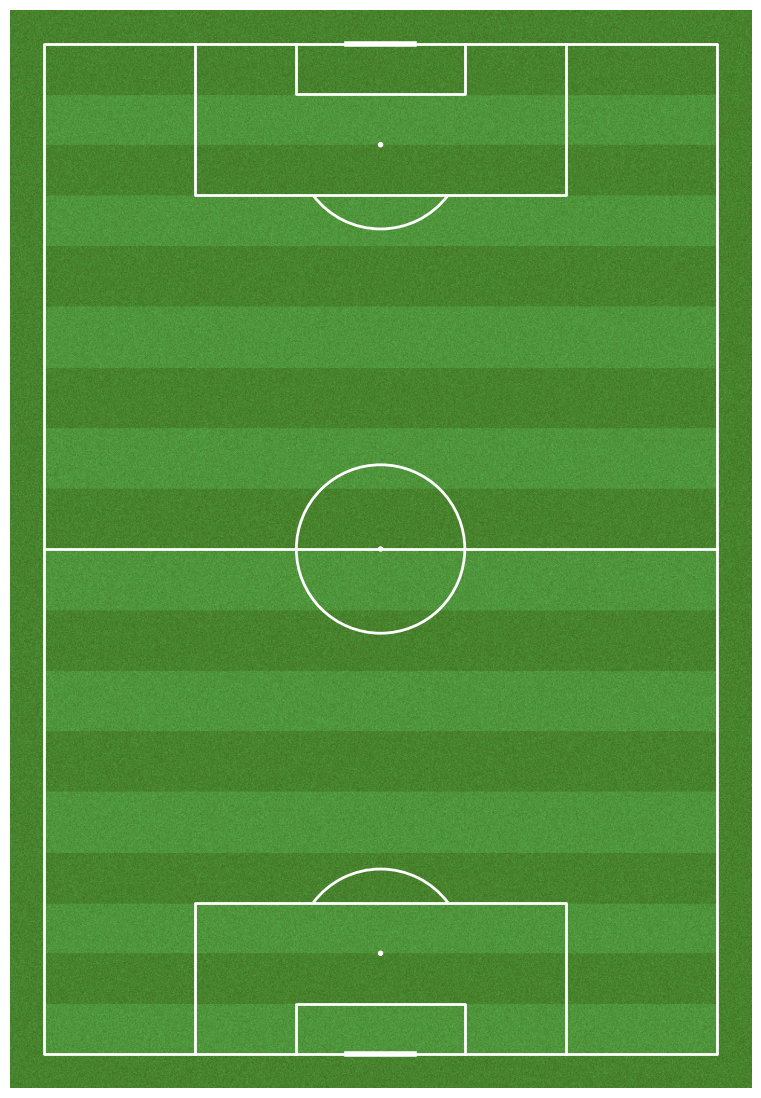

In [ ]:
from src.create_pitch import plot_team

plot_team(team,formation=(4,3,3))